Mathematical Metods using python Application in Physics and Engineering

Solve question 27 of Mathematical Metods using python Application in Physics and Engineering

<div style="font-family: Dibaj; text-align: justify; font-size: 16px;">

27. <strong>Experimental data for Maxwell-Boltzmann distribution</strong> – The data shown in the graph below were obtained during an experimental study of the distribution of speeds from a Maxwell Boltzmann distribution. The data was obtained using a velocity selector and is contained in the file mb.txt. For a detailed description of the experiment, the reader can consult the book Concepts in Thermal Physics by S.Blundell and K. Blundell (Oxford, 2006). The MB distribution is given by:

$$f(v) = \sqrt{\frac{2}{\pi}\left(\frac{m}{kT}\right)^3} v^3 e^{-\frac{mv^2}{2kT}}$$

a. Show that it is not possible to fit this data with the Maxwell-Boltzmann distribution
$$ f(v) = a v^2 \exp(-b v^2) $$

with a, b are constants, and that the best fit curve is too broad.

</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import optimize
from scipy.optimize import curve_fit
from IPython.display import display, Math

plt.rcParams['text.usetex'] = True

plt.style.use('dark_background')

In [2]:
path = '/Users/s.mustafa/Desktop/2.Programming/Projects/Physics/Mathematical Metods using python Application in Physics and Engineering/mb.txt'
mb = pd.read_csv(path)
dp = pd.DataFrame(mb).to_numpy()

$ f(v) = a{\prime} v^4 \exp(-b{\prime} v^2) $

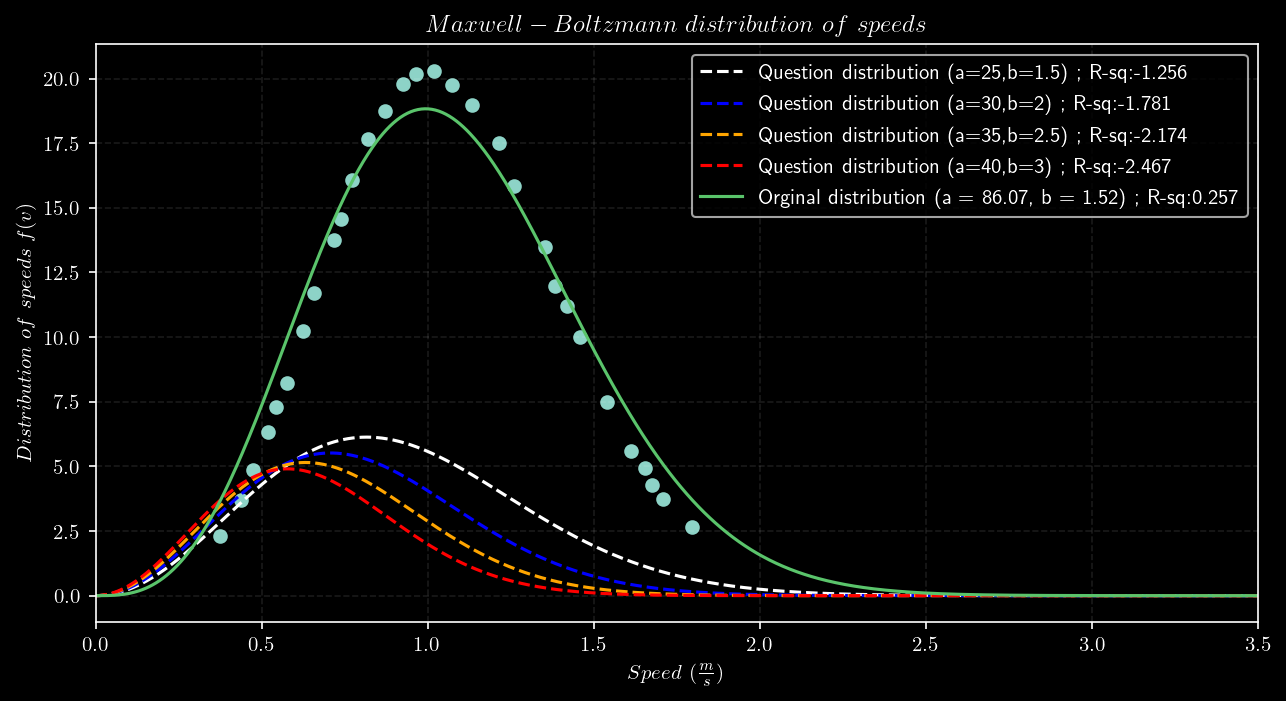

In [3]:
m = 6.6464731e-27 # atomic mass nitrogen in kg
T = 25 # room temeprature in K
k = 1.380649e-23 # Boltzmann constant in J/K

pr = mb['Probability'].to_numpy()
v2 = mb['speed v'].to_numpy()

V2 = np.linspace(0,3.5,1000)
a = np.sqrt(2/np.pi*((m/(k*T))**3))
b = m/(2*k*T)

def f_org(v,a,b): return a*v**3*np.exp(-b*v**2) # define function for MB
def f(v,a,b): return a * v**2 * np.exp(-b*v**2)
inis = [a,b]

params_org, cov_org = optimize.curve_fit(f_org,v2,pr,p0=inis)

plt.figure(figsize=(10,5),dpi=150)
plt.scatter(v2,pr)

my_ab = {
    'white':[25,1.5],
    'blue':[30,2],
    'orange':[35,2.5],
    'red':[40,3]
    }

residuals_org = pr - f(v2, params_org[0], params_org[1])
ss_res_org = np.sum(residuals_org**2)
ss_tot = np.sum((pr - np.mean(pr))**2)
r_squared_org = 1 - (ss_res_org / ss_tot)

residuals, ss_res, r_squared = [],[],[]
ss_tot = np.sum((pr - np.mean(pr))**2)

for col,i in my_ab.items():
    residuals = pr - f(v2, i[0], i[1])
    ss_res = np.sum(residuals**2)
    r_squared =1 - (ss_res / ss_tot)
    plt.plot(V2,f(V2,i[0],i[1]),color=col,linestyle='--',label=fr'Question distribution (a={i[0]},b={i[1]}) ; R-sq:{r_squared:.4}')

plt.plot(V2,f_org(V2,*params_org),color='#5AC46B',label=f'Orginal distribution (a = {params_org[0]:.4}, b = {params_org[1]:.4}) ; R-sq:{r_squared_org:.4}')
plt.xlim(0,3.5)
plt.title(fr'$Maxwell-Boltzmann \ distribution \ of \ speeds$')
plt.xlabel(fr'$Speed \ (\frac{{m}}{{s}})$')
plt.ylabel(fr'$Distribution \ of \ speeds \ f(v)$')
plt.legend()
plt.grid(True,alpha=0.1,linestyle='--')

<div style="font-family: Dibaj; text-align: justify; font-size: 16px;">

b. Show that this data shown in Figure 13.18 can be fitted successfully using a modified Maxwell-Boltzmann distribution of the type:

$ f(v) = a{\prime} v^4 \exp(-b{\prime} v^2) $

where a′, b′ are constants.
</div>

Fitted parameters: a = 146.2, b = 1.977
R-squared: 0.9994


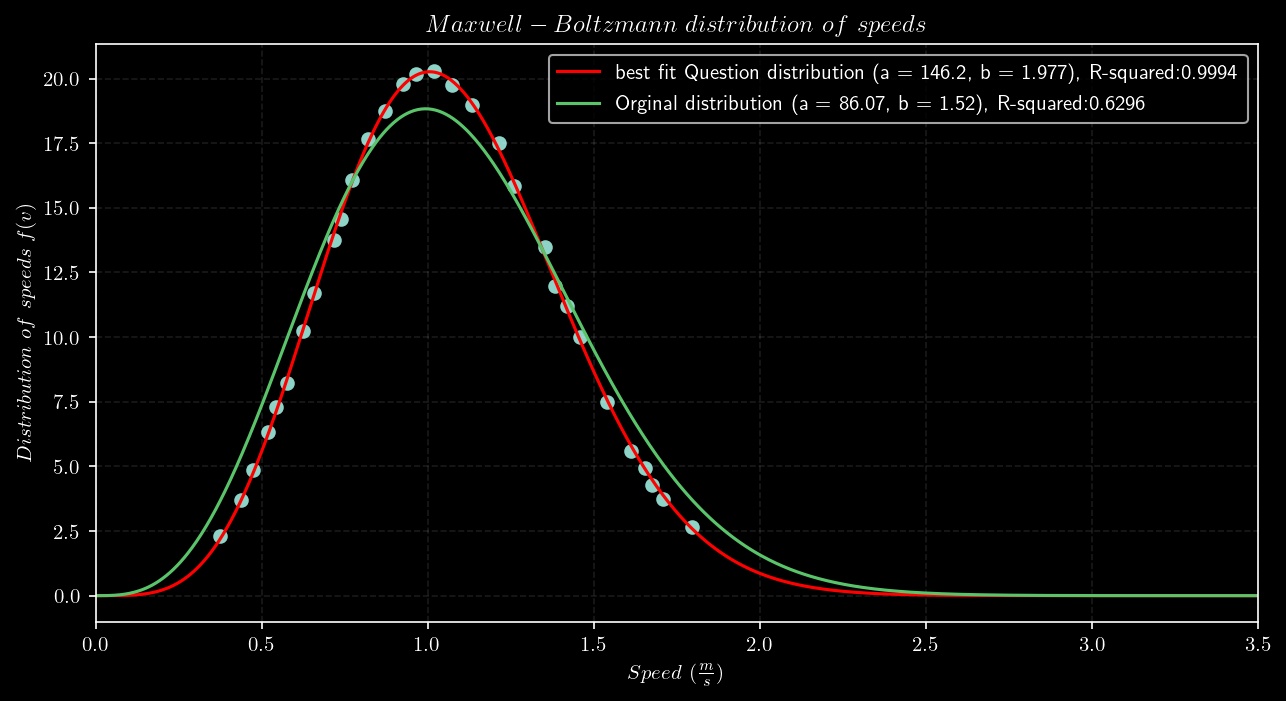

In [4]:
def f(v,a,b): return a * v**4 * np.exp(-b*v**2)
inis = [a,b]

params, cov = optimize.curve_fit(f,v2,pr,p0=inis)

residuals = pr - f(v2, params[0], params[1])
residuals_org = pr - f(v2, params_org[0], params_org[1])
ss_res = np.sum(residuals**2) ; ss_res_org = np.sum(residuals_org**2)
ss_tot = np.sum((pr - np.mean(pr))**2)
r_squared = 1 - (ss_res / ss_tot) ; r_squared_org = 1 - (ss_res_org / ss_tot)

plt.figure(figsize=(10,5),dpi=150)
plt.scatter(v2,pr)
plt.plot(V2,f(V2,*params),color='red',label=f'best fit Question distribution (a = {params[0]:.4}, b = {params[1]:.4}), R-squared:{r_squared:.4}')
plt.plot(V2,f_org(V2,*params_org),color='#5AC46B',label=f'Orginal distribution (a = {params_org[0]:.4}, b = {params_org[1]:.4}), R-squared:{r_squared_org:.4}')
plt.xlim(0,3.5)
plt.title(fr'$Maxwell-Boltzmann \ distribution \ of \ speeds$')
plt.xlabel(fr'$Speed \ (\frac{{m}}{{s}})$')
plt.ylabel(fr'$Distribution \ of \ speeds \ f(v)$')
plt.legend()
plt.grid(True,alpha=0.1,linestyle='--')

print(f'Fitted parameters: a = {params[0]:.4}, b = {params[1]:.4}')
print(f"R-squared: {r_squared:.4f}")